# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp_kelvin = city_weather["main"]["temp_max"]
        city_max_temp_celsius = city_max_temp_kelvin - 273.15  # Convert Kelvin to Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_celsius,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | isiro
Processing Record 4 of Set 1 | dongola
Processing Record 5 of Set 1 | arnedo
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | arkalyk
Processing Record 14 of Set 1 | xining
Processing Record 15 of Set 1 | san jose de jachal
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | williams lake
Processing Record 19 of Set 1 | mejit
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | happy valley-goose bay
Processing Record 22 of S

Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | nema
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | vorkuta
Processing Record 44 of Set 4 | bredasdorp
Processing Record 45 of Set 4 | haiku-pauwela
Processing Record 46 of Set 4 | roxas
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | inari
Processing Record 49 of Set 4 | dukhovnitskoye
Processing Record 0 of Set 5 | fortuna
Processing Record 1 of Set 5 | jianshui
Processing Record 2 of Set 5 | noshiro
Processing Record 3 of Set 5 | afif
Processing Record 4 of Set 5 | neelankarai
Processing Record 5 of Set 5 | hadibu
Processing Record 6 of Set 5 | ponta delgada
Processing Record 7 of Set 5 | solleftea
Processing Record 8 of Set 5 | ramos arizpe
Processing Record 9 of Set 5 | taro
Processing Record 10 of Set 5 | belmonte
Processing Record 11 of Set 5 | ourilandia do norte
City not found. Skipping...
Proce

Processing Record 29 of Set 8 | anqing
Processing Record 30 of Set 8 | rio do sul
Processing Record 31 of Set 8 | rongelap
Processing Record 32 of Set 8 | horta
Processing Record 33 of Set 8 | maracaibo
Processing Record 34 of Set 8 | kirensk
Processing Record 35 of Set 8 | general acha
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | kawambwa
Processing Record 38 of Set 8 | ikalamavony
Processing Record 39 of Set 8 | la ronge
Processing Record 40 of Set 8 | taunsa
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | verkhnevilyuysk
Processing Record 43 of Set 8 | cortez
Processing Record 44 of Set 8 | olinda
Processing Record 45 of Set 8 | dauphin
Processing Record 46 of Set 8 | adrar
Processing Record 47 of Set 8 | keflavik
Processing Record 48 of Set 8 | malango
Processing Record 49 of Set 8 | kushima
Processing Record 0 of Set 9 | prince rupert
Processing Record 1 of Set 9 | ivano-frankove
Processing Record 2 of Set 9 | al bawiti
Process

Processing Record 19 of Set 12 | hamamatsu
Processing Record 20 of Set 12 | hovd
Processing Record 21 of Set 12 | parkes
Processing Record 22 of Set 12 | newman
Processing Record 23 of Set 12 | tirlyanskiy
Processing Record 24 of Set 12 | duba
Processing Record 25 of Set 12 | quibala
Processing Record 26 of Set 12 | gallivare
City not found. Skipping...
Processing Record 27 of Set 12 | filey
Processing Record 28 of Set 12 | woolgoolga
Processing Record 29 of Set 12 | raton
Processing Record 30 of Set 12 | kapuskasing
Processing Record 31 of Set 12 | sitangkai
Processing Record 32 of Set 12 | pingnan
Processing Record 33 of Set 12 | saraqib
Processing Record 34 of Set 12 | zaysan
Processing Record 35 of Set 12 | port isabel
Processing Record 36 of Set 12 | burumburum
Processing Record 37 of Set 12 | vernon
Processing Record 38 of Set 12 | revda
Processing Record 39 of Set 12 | inarajan village
Processing Record 40 of Set 12 | rhyl
Processing Record 41 of Set 12 | kalkaman
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,7.81,71,0,4.12,AR,1709514381
1,adamstown,-25.0660,-130.1015,24.84,69,2,6.89,PN,1709514648
2,isiro,2.7739,27.6160,21.06,90,38,1.57,CD,1709514648
3,dongola,19.1667,30.4833,19.09,14,87,4.85,SD,1709514648
4,arnedo,42.2167,-2.1000,2.72,82,17,2.01,ES,1709514648


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,7.81,71,0,4.12,AR,1709514381
1,adamstown,-25.0660,-130.1015,24.84,69,2,6.89,PN,1709514648
2,isiro,2.7739,27.6160,21.06,90,38,1.57,CD,1709514648
3,dongola,19.1667,30.4833,19.09,14,87,4.85,SD,1709514648
4,arnedo,42.2167,-2.1000,2.72,82,17,2.01,ES,1709514648


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Creating formula to pull in date of weather reporting
# Formatting date
date_format = "%m/%d/%Y"

# Get the date from the first row (assuming all rows have the same date)
plot_date = pd.to_datetime(city_data_df["Date"].iloc[0], unit='s').strftime(date_format)
print(plot_date)

03/04/2024


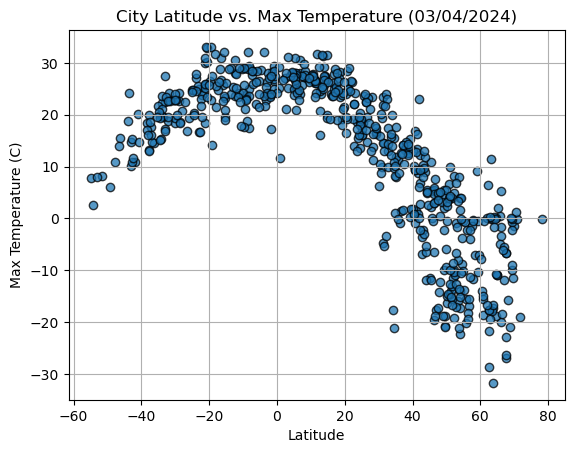

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ({})".format(plot_date))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

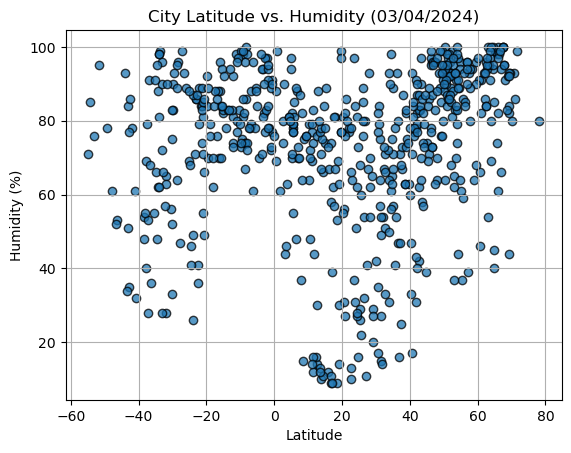

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ({})".format(plot_date))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

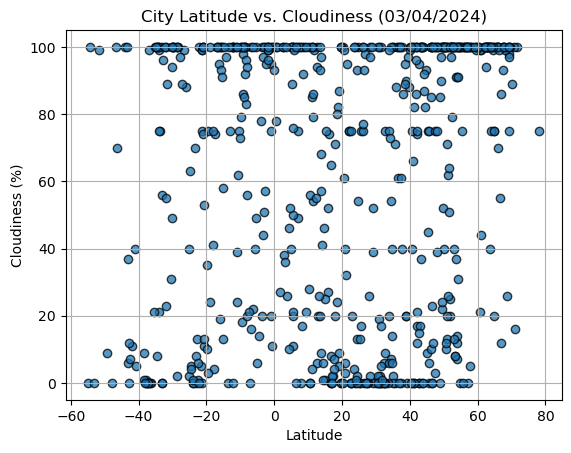

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ({})".format(plot_date))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

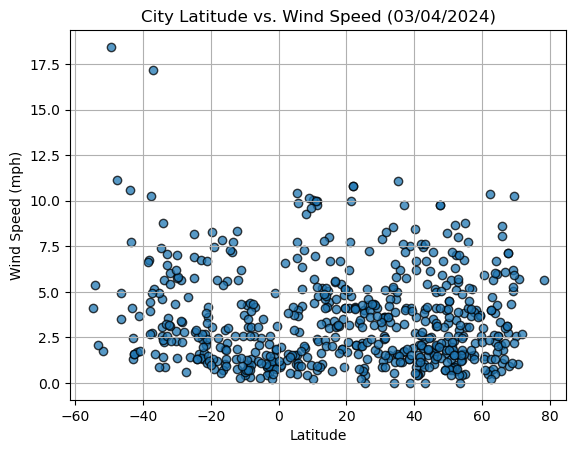

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed ({})".format(plot_date))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere, line_eq):
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, hemisphere, fontsize=15, color="red")
    plt.plot(x_values, y_values, color="red")
    plt.grid(True)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,isiro,2.7739,27.6160,21.06,90,38,1.57,CD,1709514648
3,dongola,19.1667,30.4833,19.09,14,87,4.85,SD,1709514648
4,arnedo,42.2167,-2.1000,2.72,82,17,2.01,ES,1709514648
5,tura,25.5198,90.2201,18.47,60,17,0.44,IN,1709514649
8,utrik,11.2278,169.8474,26.66,77,100,10.00,MH,1709514649


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,7.81,71,0,4.12,AR,1709514381
1,adamstown,-25.0660,-130.1015,24.84,69,2,6.89,PN,1709514648
6,invercargill,-46.4000,168.3500,15.57,53,70,4.92,NZ,1709514649
7,grytviken,-54.2811,-36.5092,2.59,85,100,5.36,GS,1709514649
11,hermanus,-34.4187,19.2345,19.89,88,100,2.59,ZA,1709514649


###  Temperature vs. Latitude Linear Regression Plot

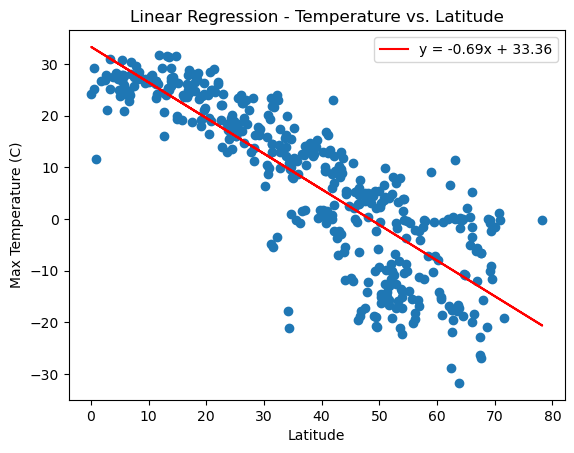

the r-value is:-0.8525161391368438


In [16]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope + intercept

# Create line equation
line_eq_northern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=line_eq_northern)
plt.title("Linear Regression - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

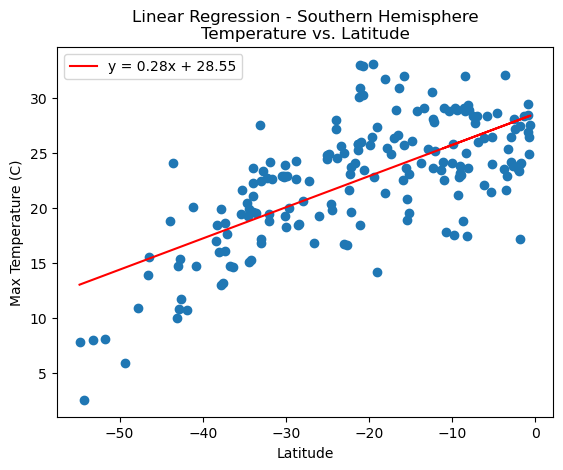

the r-value is:0.6888640038221981


In [17]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)

# Get regression values
regress_values_southern = x_values_southern * slope + intercept

# Create line equation
line_eq_southern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line for Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=line_eq_southern)
plt.title("Linear Regression - Southern Hemisphere\nTemperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:** In both the northen and southern hemisphere, the further away from the equator (0) a city is, the lower the max tempature is. 

### Humidity vs. Latitude Linear Regression Plot

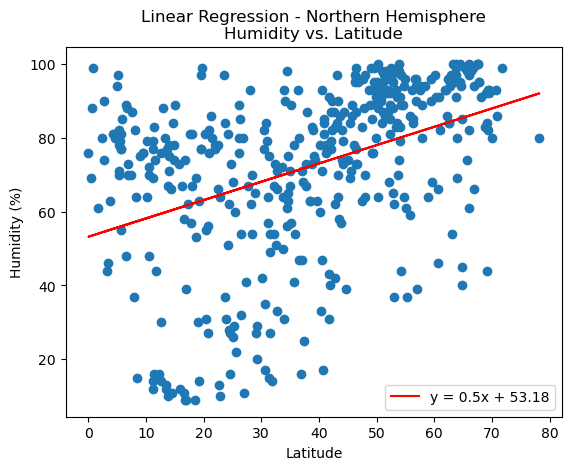

the r-value is:0.40563521203199415


In [18]:
# Northern Hemisphere
# Linear regression for Humidity vs. Latitude for Northern Hemisphere
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern_humidity, y_values_northern_humidity)

# Get regression values
regress_values_northern_humidity = x_values_northern_humidity * slope + intercept

# Create line equation
line_eq_northern_humidity = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line for Northern Hemisphere
plt.scatter(x_values_northern_humidity, y_values_northern_humidity)
plt.plot(x_values_northern_humidity, regress_values_northern_humidity, "r-", label=line_eq_northern_humidity)
plt.title("Linear Regression - Northern Hemisphere\nHumidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

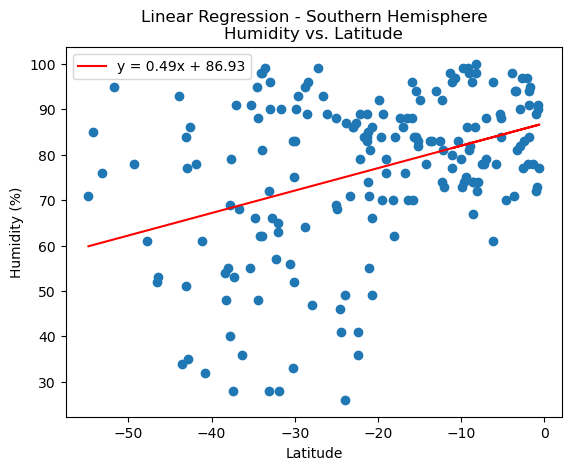

the r-value is:0.3842451614288939


In [19]:
# Southern Hemisphere
# Linear regression for Humidity vs. Latitude for Southern Hemisphere
x_values_southern_humidity = southern_hemi_df["Lat"]
y_values_southern_humidity = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern_humidity, y_values_southern_humidity)

# Get regression values
regress_values_southern_humidity = x_values_southern_humidity * slope + intercept

# Create line equation
line_eq_southern_humidity = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line for Southern Hemisphere
plt.scatter(x_values_southern_humidity, y_values_southern_humidity)
plt.plot(x_values_southern_humidity, regress_values_southern_humidity, "r-", label=line_eq_southern_humidity)
plt.title("Linear Regression - Southern Hemisphere\nHumidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:**  In the northen, the closer to equator (0) a city is, the lower the Humidity is while the opposite is true in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

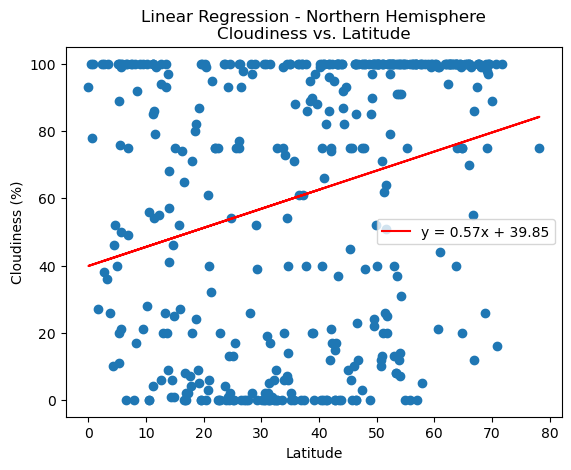

the r-value is:0.2665378152507501


In [20]:
# Northern Hemisphere
# Linear regression for Cloudiness vs. Latitude for Northern Hemisphere
x_values_northern_cloudiness = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern_cloudiness, y_values_northern_cloudiness)

# Get regression values
regress_values_northern_cloudiness = x_values_northern_cloudiness * slope + intercept

# Create line equation
line_eq_northern_cloudiness = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line for Northern Hemisphere
plt.scatter(x_values_northern_cloudiness, y_values_northern_cloudiness)
plt.plot(x_values_northern_cloudiness, regress_values_northern_cloudiness, "r-", label=line_eq_northern_cloudiness)
plt.title("Linear Regression - Northern Hemisphere\nCloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

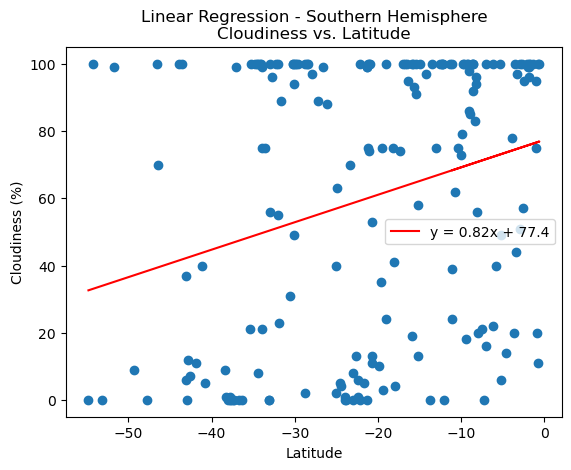

the r-value is:0.2699172443025775


In [21]:
# Southern Hemisphere
# Linear regression for Cloudiness vs. Latitude for Southern Hemisphere
x_values_southern_cloudiness = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern_cloudiness, y_values_southern_cloudiness)

# Get regression values
regress_values_southern_cloudiness = x_values_southern_cloudiness * slope + intercept

# Create line equation
line_eq_southern_cloudiness = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line for Southern Hemisphere
plt.scatter(x_values_southern_cloudiness, y_values_southern_cloudiness)
plt.plot(x_values_southern_cloudiness, regress_values_southern_cloudiness, "r-", label=line_eq_southern_cloudiness)
plt.title("Linear Regression - Southern Hemisphere\nCloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:** The r-value of 0.266 in the northern hemisphere and 0.269 in the southern hemisphere indicates a strong linear relationship between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

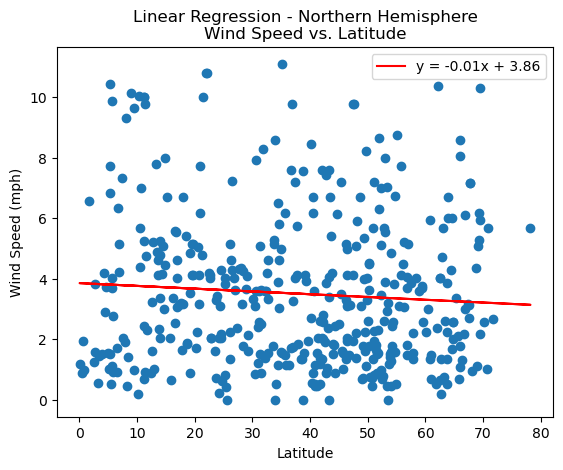

the r-value is:-0.07091975699604035


In [22]:
# Northern Hemisphere
# Linear regression for Wind Speed vs. Latitude for Northern Hemisphere
x_values_northern_wind = northern_hemi_df["Lat"]
y_values_northern_wind = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern_wind, y_values_northern_wind)

# Get regression values
regress_values_northern_wind = x_values_northern_wind * slope + intercept

# Create line equation
line_eq_northern_wind = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line for Northern Hemisphere
plt.scatter(x_values_northern_wind, y_values_northern_wind)
plt.plot(x_values_northern_wind, regress_values_northern_wind, "r-", label=line_eq_northern_wind)
plt.title("Linear Regression - Northern Hemisphere\nWind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

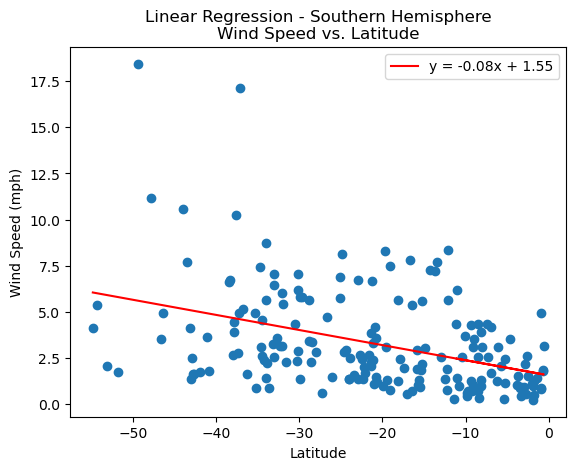

the r-value is:-0.40535574164849497


In [23]:
# Southern Hemisphere
# Linear regression for Wind Speed vs. Latitude for Southern Hemisphere
x_values_southern_wind = southern_hemi_df["Lat"]
y_values_southern_wind = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern_wind, y_values_southern_wind)

# Get regression values
regress_values_southern_wind = x_values_southern_wind * slope + intercept

# Create line equation
line_eq_southern_wind = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line for Southern Hemisphere
plt.scatter(x_values_southern_wind, y_values_southern_wind)
plt.plot(x_values_southern_wind, regress_values_southern_wind, "r-", label=line_eq_southern_wind)
plt.title("Linear Regression - Southern Hemisphere\nWind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:** The r-value of -0.0709 in the northern hemisphere and -0.4053 in the southern hemisphere indicates a moderate linear relationship between Wind Speed and Latitude.